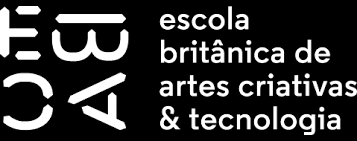

___

<center><h1>Exercício 02 - Módulo 23</h1></center>
<center><h1>Random Forest</h1></center>



## **Curso**: Cientista de Dados 
## **Aluno**: Victor Resende

___

### Técnicas de Ensemble

Significa um algoritmo que utiliza vários modelos em conjunto com o objetivo de obter um modelo final com melhores resultados.

**Random Forest:**

**Random Forest** é um ensemble de árvores de decisão treinadas em subconjuntos de dados e subconjuntos de features. Ele usa uma abordagem de bagging combinada com a seleção aleatória de features para reduzir o overfitting e aumentar a robustez. Aqui estão os seguintes passos:

#### Passo 1: Criação de Subconjuntos de Dados (Bootstrap)

- Semelhante ao Bagging, o Random Forest cria múltiplos subconjuntos de dados com substituição. Cada árvore de decisão é treinada em um subconjunto dos dados.


#### Passo 2: Seleção Aleatória de Features (Feature Selection)

- Ao contrário do Bagging, cada árvore do Random Forest é treinada com um subconjunto aleatório de features. Isso aumenta a diversidade entre as árvores e melhora a generalização do modelo.


#### Passo 3: Treinamento das Árvores de Decisão (Modelagem)

- Cada árvore de decisão é treinada independentemente em seu subconjunto de dados e features. Elas podem crescer até a profundidade máxima (não é necessário podar).

#### Passo 4: Agregação dos Resultados

- Para **classificação**: as previsões de cada árvore são combinadas por votação majoritária.
- Para **regressão**: as previsões são combinadas pela média das saídas.

#### Resumo da ópera:

**Random Forest** é um algoritmo de aprendizado de máquina baseado em árvores de decisão, onde várias árvores são treinadas em subconjuntos diferentes dos dados e de features. A principal diferença do Random Forest para o **Bagging** é que, além de criar amostras de dados diferentes, ele também usa diferentes subconjuntos de features para treinar cada árvore. Isso faz com que as árvores sejam mais variadas e reduz a correlação entre elas, resultando em um modelo mais robusto e com **menor overfitting**.

Diferença entre Bagging e Random Forest:

- **Bagging**: cria vários subconjuntos dos dados (bootstrap) e treina árvores de decisão completas em cada um. O objetivo é reduzir a variância combinando os modelos.
- **Random Forest**: além de usar o Bagging, o Random Forest também realiza uma seleção aleatória de features em cada nó da árvore de decisão, o que reduz ainda mais a correlação entre as árvores, tornando o modelo mais eficiente em evitar overfitting.

#### Exemplo:

#### Implementação em Python do Random Forest:

- Incluindo Bootstrap, Feature Selection, Modelagem com Árvores de Decisão e Agregação.
- Gerando tabelas de frequência e gráficos para melhor visualização.

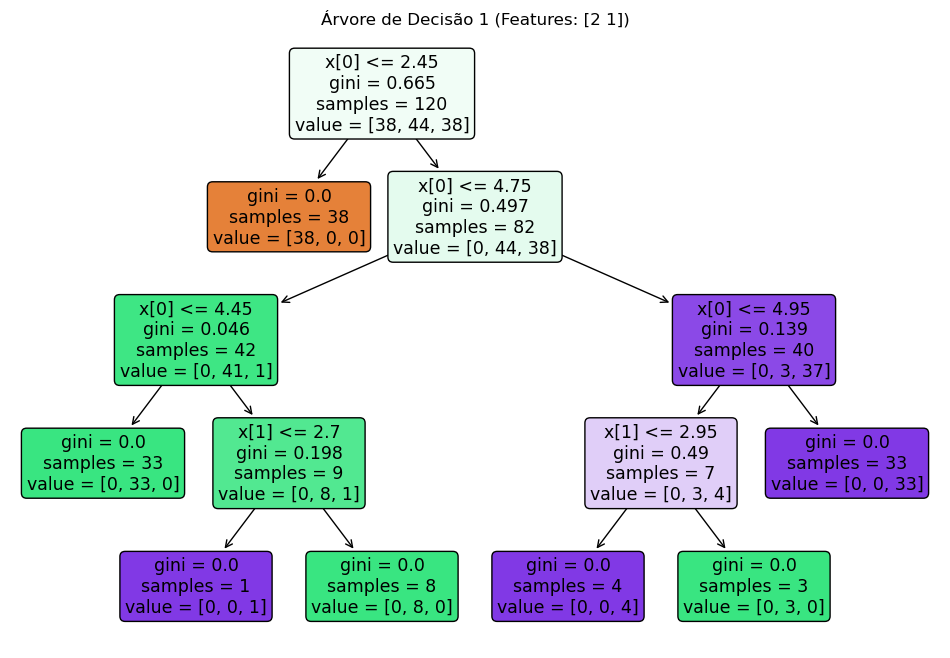

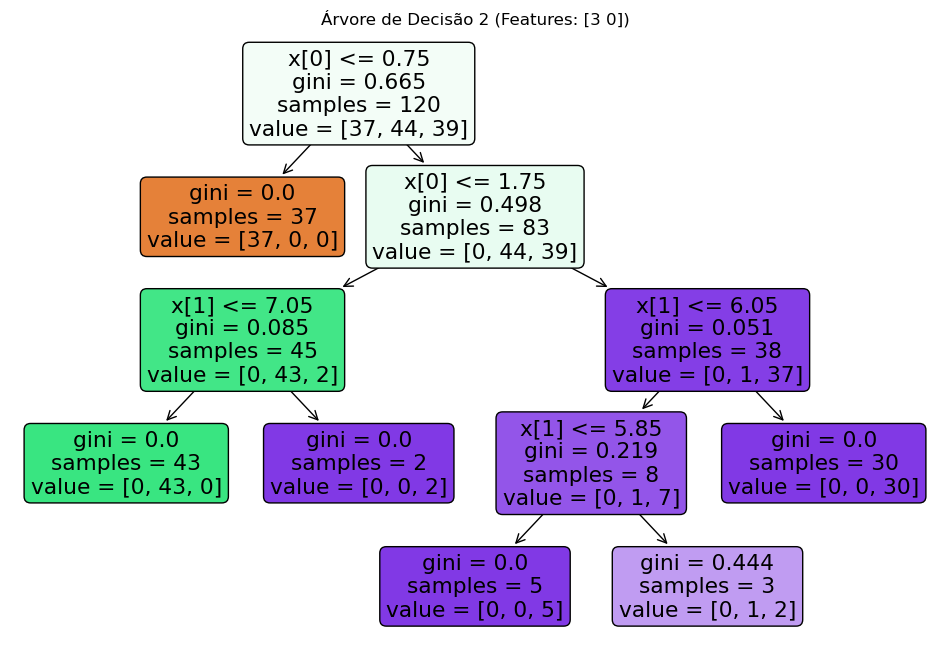

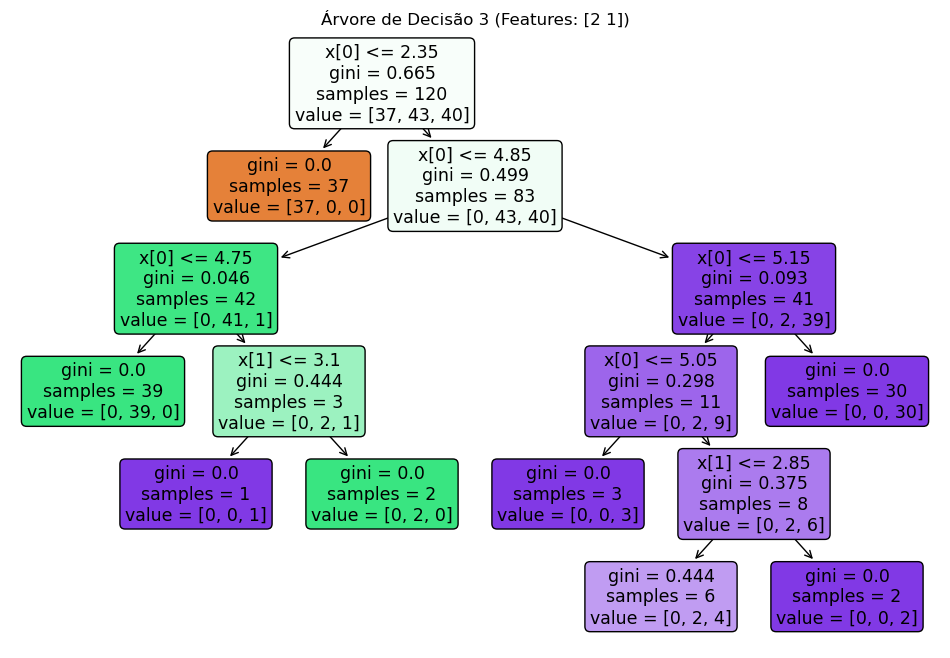

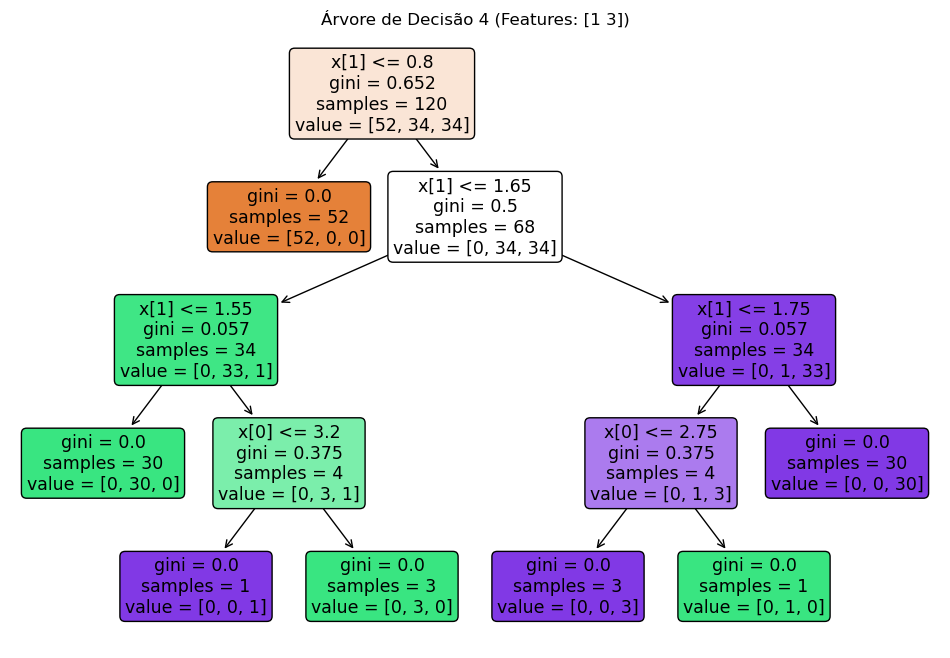

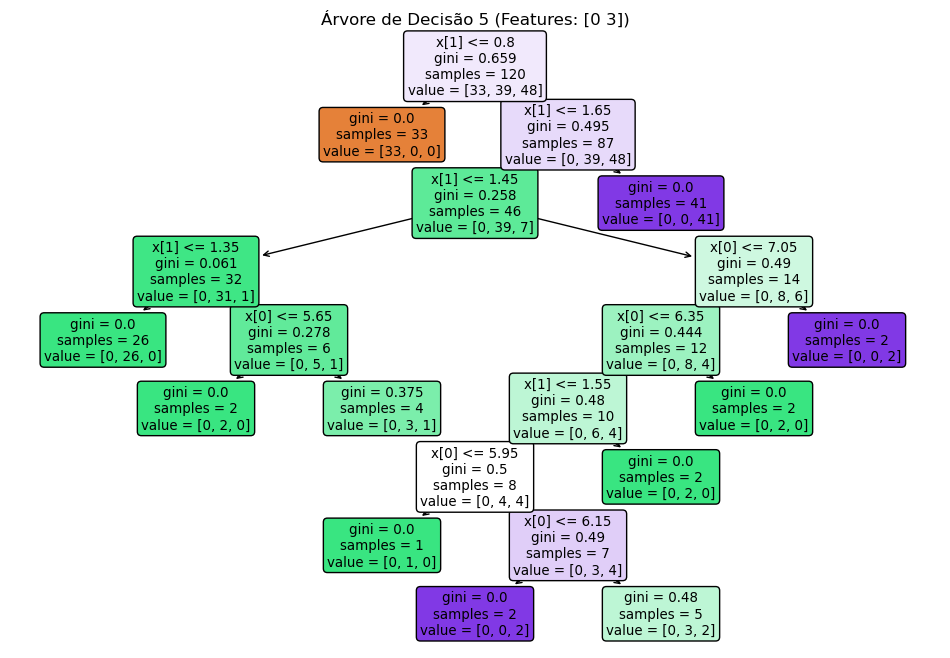

Acurácia do modelo Random Forest: 1.00


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


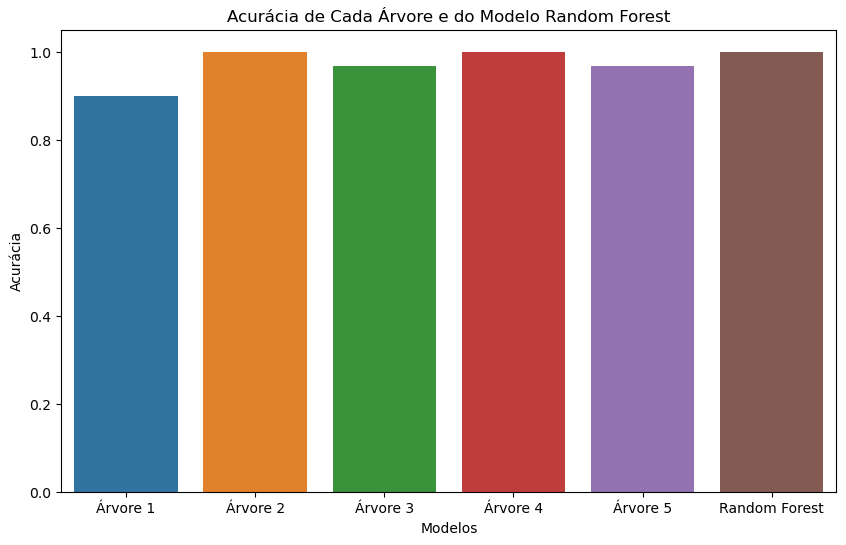

Frequência das previsões (classes):
{0: 10, 1: 9, 2: 11}


In [21]:
# Carregando os pacotes necessários:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 1. Bootstrap (Amostragem com substituição):
# Função bootstrap_sample para criar subconjuntos de dados.
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[idxs], y[idxs]

# 2. Random Forest com Feature Selection e visualização:
class RandomForestClassifierWithVisualization:
    def __init__(self, base_model, n_estimators, max_features):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.models = []
        self.accuracies = []
        self.max_features = max_features  # Número máximo de features a serem usadas

    def fit(self, X, y, X_test, y_test):
        n_features = X.shape[1]
        for i in range(self.n_estimators):
            # 2.1 Bootstrap: amostragem dos dados:
            X_bootstrap, y_bootstrap = bootstrap_sample(X, y)
            
            # 2.2 Feature Selection: escolha aleatória de um subconjunto de features:
            # Cada árvore é treinada em um subconjunto aleatório de features, conforme o parâmetro max_features.
            feature_idxs = np.random.choice(n_features, size=self.max_features, replace=False)
            X_bootstrap_selected = X_bootstrap[:, feature_idxs]
            X_test_selected = X_test[:, feature_idxs]
            
            # 3. Modelagem: treinar árvore de decisão
            # Cada árvore é treinada com o modelo base (árvore de decisão).
            model = self.base_model(random_state=i)
            model.fit(X_bootstrap_selected, y_bootstrap)
            self.models.append((model, feature_idxs))
            
            # Prever no conjunto de teste e calcular a acurácia da árvore individual
            y_pred_tree = model.predict(X_test_selected)
            accuracy = accuracy_score(y_test, y_pred_tree)
            self.accuracies.append(accuracy)
            
            # Visualização da árvore de decisão
            plt.figure(figsize=(12, 8))
            plot_tree(model, filled=True, rounded=True)
            plt.title(f'Árvore de Decisão {i+1} (Features: {feature_idxs})')
            plt.show()

    def predict(self, X):
        # 4. Agregação (Votação majoritária)
        predictions = []
        for model, feature_idxs in self.models:
            X_selected = X[:, feature_idxs]
            predictions.append(model.predict(X_selected))
        predictions = np.array(predictions)
        return np.squeeze(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions))

# Carregando dados:
data = load_iris()
X, y = data.data, data.target

# Dividindo em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciando RandomForestClassifier com visualização:
rf_model = RandomForestClassifierWithVisualization(base_model=DecisionTreeClassifier, n_estimators=5, max_features=2)

# Treinando o modelo:
rf_model.fit(X_train, y_train, X_test, y_test)

# Previsões no conjunto de teste com o modelo Random Forest:
y_pred = rf_model.predict(X_test)

# Avaliação do modelo agregado (Random Forest):
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo Random Forest: {accuracy_rf:.2f}')

# Plotando a acurácia de cada árvore e do modelo Random Forest:
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"Árvore {i+1}" for i in range(rf_model.n_estimators)] + ['Random Forest'],
            y=rf_model.accuracies + [accuracy_rf])
plt.title('Acurácia de Cada Árvore e do Modelo Random Forest')
plt.ylabel('Acurácia')
plt.xlabel('Modelos')
plt.show()

# Tabela de frequência das previsões:
unique, counts = np.unique(y_pred, return_counts=True)
print("Frequência das previsões (classes):")
print(dict(zip(unique, counts)))


### Análises:

- Cada árvore plotada mostra as divisões e os nós com os subconjuntos de features.
- **Gráfico de Acurácia**: um gráfico de barras compara a acurácia de cada árvore e do modelo agregado (Random Forest).
- **Tabela de Frequência**: exibe a frequência de previsões das classes feitas pelo modelo Random Forest no conjunto de teste.
- Isso proporciona uma visão clara de como cada árvore contribui e como a agregação no Random Forest melhora o desempenho.

### Verificando Overffiting:

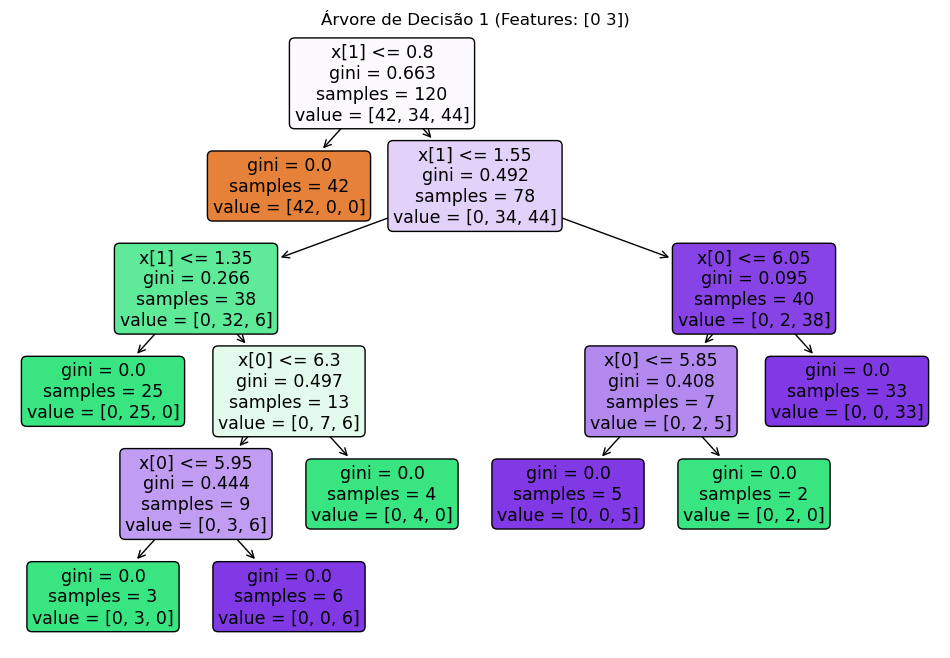

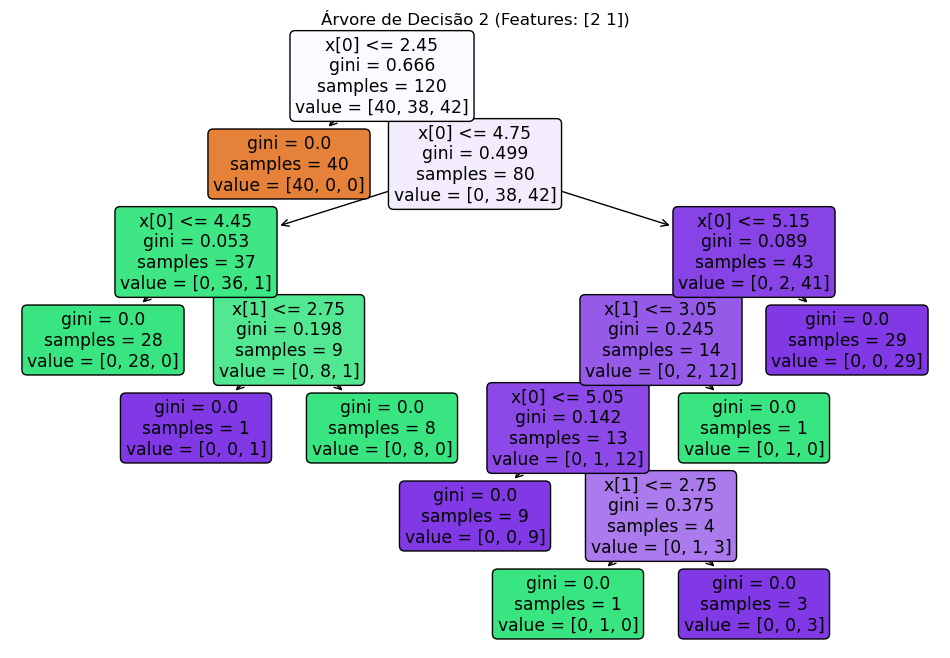

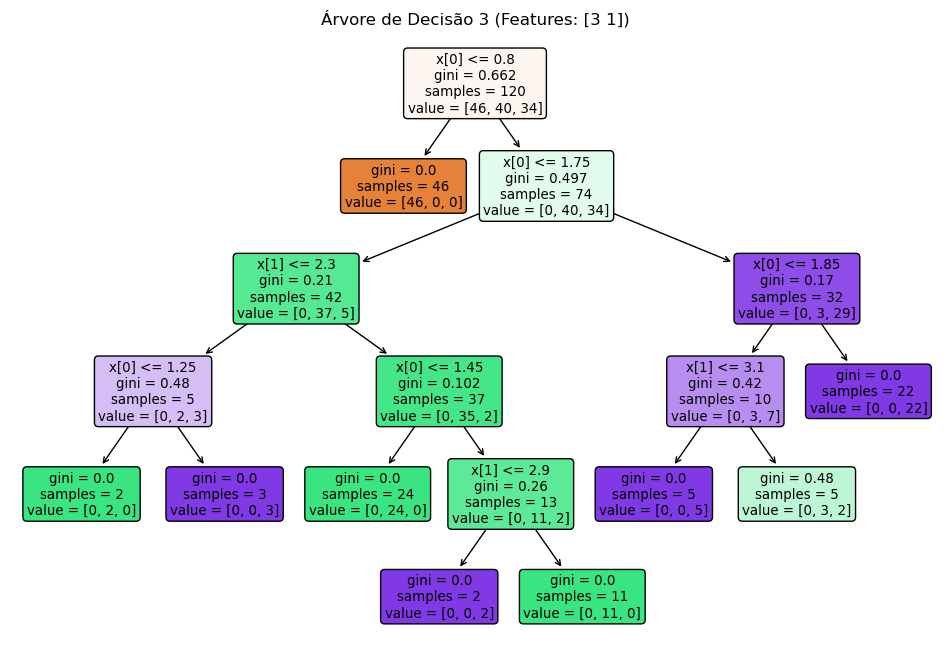

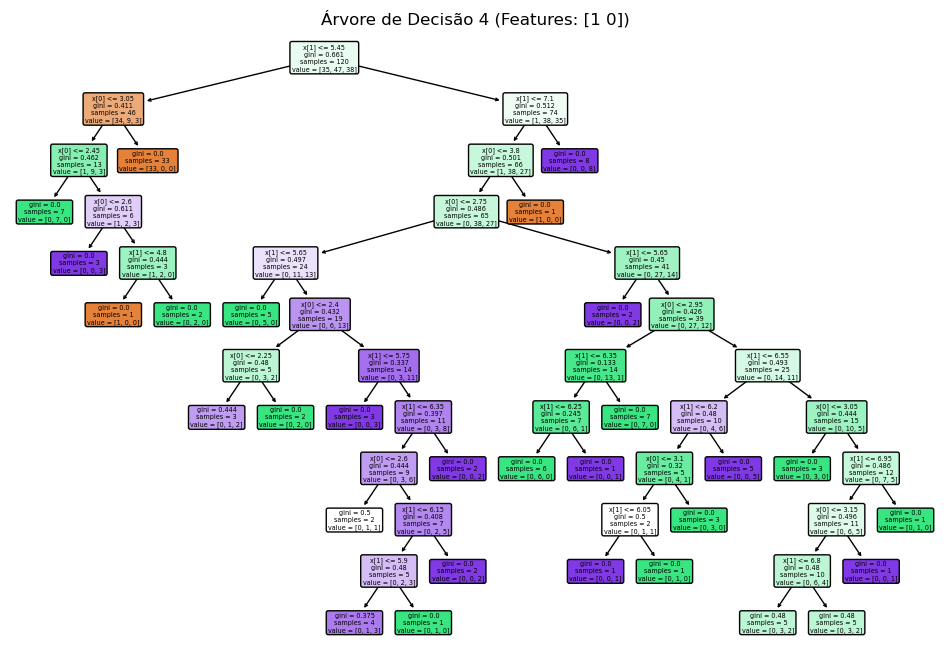

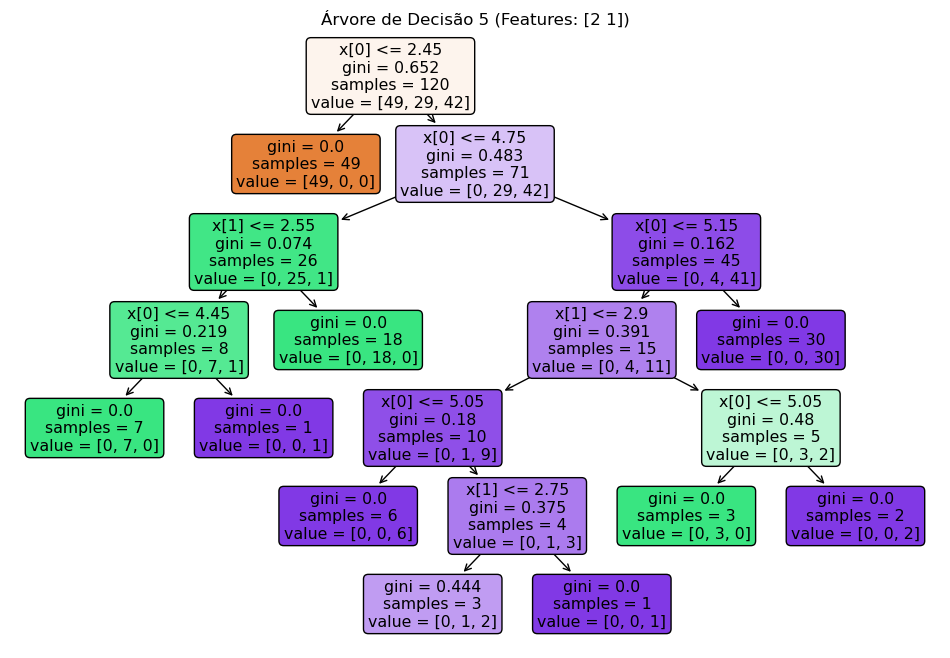

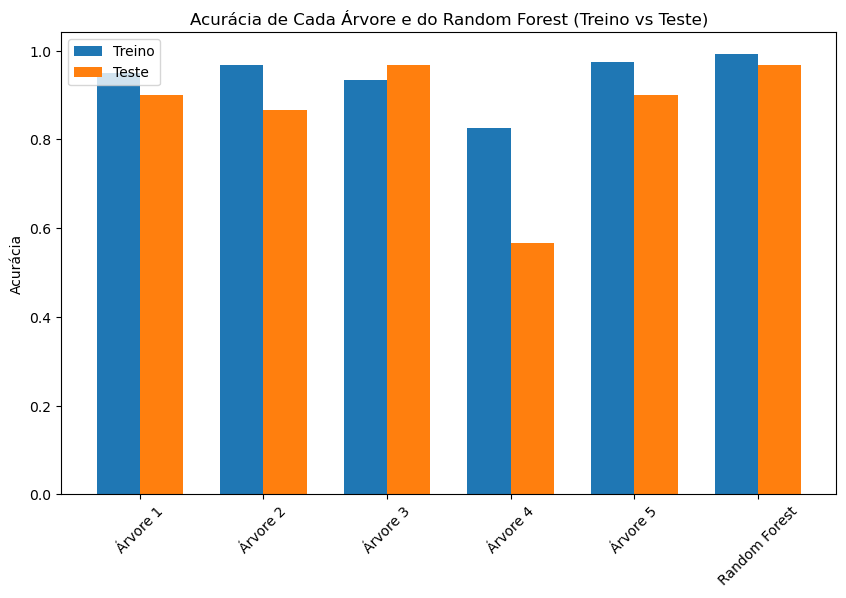

Frequência das previsões (classes no teste):
{0: 10, 1: 8, 2: 12}


In [24]:
# Modificar a classe RandomForestClassifierWithVisualization para calcular acurácia no treino
class RandomForestClassifierWithOverfittingCheck:
    def __init__(self, base_model, n_estimators, max_features):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.models = []
        self.train_accuracies = []
        self.test_accuracies = []
        self.max_features = max_features  # Número máximo de features a serem usadas

    def fit(self, X_train, y_train, X_test, y_test):
        n_features = X_train.shape[1]
        for i in range(self.n_estimators):
            # 1. Bootstrap: amostragem dos dados
            X_bootstrap, y_bootstrap = bootstrap_sample(X_train, y_train)
            
            # 2. Feature Selection: escolha aleatória de um subconjunto de features
            feature_idxs = np.random.choice(n_features, size=self.max_features, replace=False)
            X_bootstrap_selected = X_bootstrap[:, feature_idxs]
            X_train_selected = X_train[:, feature_idxs]
            X_test_selected = X_test[:, feature_idxs]
            
            # 3. Modelagem: treinar árvore de decisão
            model = self.base_model(random_state=i)
            model.fit(X_bootstrap_selected, y_bootstrap)
            self.models.append((model, feature_idxs))
            
            # Prever no conjunto de treino e teste
            y_pred_train = model.predict(X_train_selected)
            y_pred_test = model.predict(X_test_selected)
            
            # Calcular acurácias
            train_accuracy = accuracy_score(y_train, y_pred_train)
            test_accuracy = accuracy_score(y_test, y_pred_test)
            
            self.train_accuracies.append(train_accuracy)
            self.test_accuracies.append(test_accuracy)
            
            # Visualização da árvore de decisão
            plt.figure(figsize=(12, 8))
            plot_tree(model, filled=True, rounded=True)
            plt.title(f'Árvore de Decisão {i+1} (Features: {feature_idxs})')
            plt.show()

    def predict(self, X):
        # Agregação (votação majoritária)
        predictions = []
        for model, feature_idxs in self.models:
            X_selected = X[:, feature_idxs]
            predictions.append(model.predict(X_selected))
        predictions = np.array(predictions)
        return np.squeeze(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions))

# Carregar dados
data = load_iris()
X, y = data.data, data.target

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar RandomForestClassifier com verificação de overfitting
rf_model = RandomForestClassifierWithOverfittingCheck(base_model=DecisionTreeClassifier, n_estimators=5, max_features=2)

# Treinar o modelo
rf_model.fit(X_train, y_train, X_test, y_test)

# Prever no conjunto de teste com o modelo Random Forest
y_pred = rf_model.predict(X_test)

# Avaliar a acurácia do modelo Random Forest no conjunto de treino e teste
accuracy_train_rf = accuracy_score(y_train, rf_model.predict(X_train))
accuracy_test_rf = accuracy_score(y_test, y_pred)

# Plotar a acurácia de cada árvore (treino vs teste) e do modelo Random Forest
plt.figure(figsize=(10, 6))
bar_labels = [f"Árvore {i+1}" for i in range(rf_model.n_estimators)] + ['Random Forest']

train_accuracies_with_rf = rf_model.train_accuracies + [accuracy_train_rf]
test_accuracies_with_rf = rf_model.test_accuracies + [accuracy_test_rf]

x = np.arange(len(bar_labels))  # Posições das barras
width = 0.35  # Largura das barras

plt.bar(x - width/2, train_accuracies_with_rf, width, label='Treino')
plt.bar(x + width/2, test_accuracies_with_rf, width, label='Teste')

# Configurações do gráfico
plt.ylabel('Acurácia')
plt.title('Acurácia de Cada Árvore e do Random Forest (Treino vs Teste)')
plt.xticks(x, bar_labels, rotation=45)
plt.legend()

plt.show()

# Tabela de frequência das previsões no conjunto de teste
unique, counts = np.unique(y_pred, return_counts=True)
print("Frequência das previsões (classes no teste):")
print(dict(zip(unique, counts)))


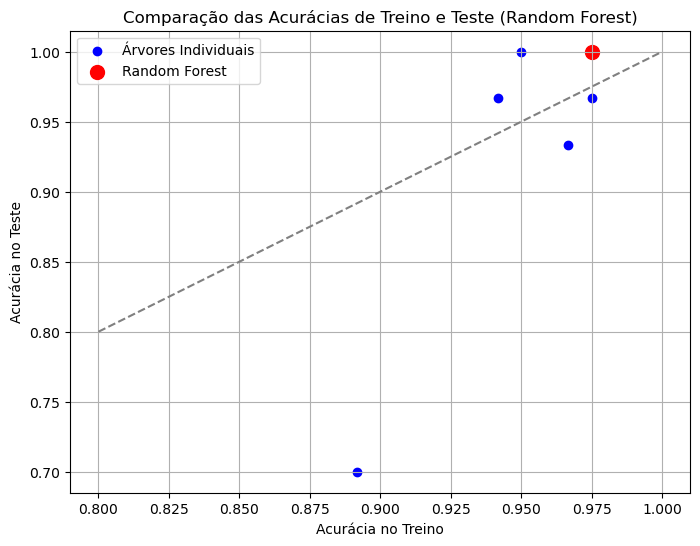

Frequência das previsões (classes no teste):
{0: 10, 1: 9, 2: 11}


In [28]:
# Função para amostragem bootstrap
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], y[indices]

# Classe para Random Forest com verificação de overfitting
class RandomForestClassifierWithOverfittingCheck:
    def __init__(self, base_model, n_estimators, max_features):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.models = []
        self.train_accuracies = []
        self.test_accuracies = []
        self.max_features = max_features  # Número máximo de features a serem usadas

    def fit(self, X_train, y_train, X_test, y_test):
        n_features = X_train.shape[1]
        for i in range(self.n_estimators):
            # 1. Bootstrap: amostragem dos dados
            X_bootstrap, y_bootstrap = bootstrap_sample(X_train, y_train)
            
            # 2. Feature Selection: escolha aleatória de um subconjunto de features
            feature_idxs = np.random.choice(n_features, size=self.max_features, replace=False)
            X_bootstrap_selected = X_bootstrap[:, feature_idxs]
            X_train_selected = X_train[:, feature_idxs]
            X_test_selected = X_test[:, feature_idxs]
            
            # 3. Modelagem: treinar árvore de decisão
            model = self.base_model(random_state=i)
            model.fit(X_bootstrap_selected, y_bootstrap)
            self.models.append((model, feature_idxs))
            
            # Prever no conjunto de treino e teste
            y_pred_train = model.predict(X_train_selected)
            y_pred_test = model.predict(X_test_selected)
            
            # Calcular acurácias
            train_accuracy = accuracy_score(y_train, y_pred_train)
            test_accuracy = accuracy_score(y_test, y_pred_test)
            
            self.train_accuracies.append(train_accuracy)
            self.test_accuracies.append(test_accuracy)

    def predict(self, X):
        # Agregação (votação majoritária)
        predictions = []
        for model, feature_idxs in self.models:
            X_selected = X[:, feature_idxs]
            predictions.append(model.predict(X_selected))
        predictions = np.array(predictions)
        return np.squeeze(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions))

# Carregar dados
data = load_iris()
X, y = data.data, data.target

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar RandomForestClassifier com verificação de overfitting
rf_model = RandomForestClassifierWithOverfittingCheck(base_model=DecisionTreeClassifier, n_estimators=5, max_features=2)

# Treinar o modelo
rf_model.fit(X_train, y_train, X_test, y_test)

# Prever no conjunto de teste com o modelo Random Forest
y_pred = rf_model.predict(X_test)

# Avaliar a acurácia do modelo Random Forest no conjunto de treino e teste
accuracy_train_rf = accuracy_score(y_train, rf_model.predict(X_train))
accuracy_test_rf = accuracy_score(y_test, y_pred)

# Gráfico de dispersão para comparar as acurácias de treino e teste
plt.figure(figsize=(8, 6))
plt.scatter(rf_model.train_accuracies, rf_model.test_accuracies, color='blue', label='Árvores Individuais')
plt.scatter([accuracy_train_rf], [accuracy_test_rf], color='red', label='Random Forest', s=100)

# Configurações do gráfico
plt.plot([0.8, 1.0], [0.8, 1.0], '--', color='gray')  # Linha de referência ideal (sem overfitting)
plt.xlabel('Acurácia no Treino')
plt.ylabel('Acurácia no Teste')
plt.title('Comparação das Acurácias de Treino e Teste (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# Tabela de frequência das previsões no conjunto de teste
unique, counts = np.unique(y_pred, return_counts=True)
print("Frequência das previsões (classes no teste):")
print(dict(zip(unique, counts)))


### Explicação do gráfico de dispersão:
- Pontos azuis: representam a comparação entre a acurácia de treino e teste para cada árvore individualmente.
- Ponto vermelho: representa a acurácia do modelo final de Random Forest.
- Linha cinza pontilhada: representa a linha ideal onde a acurácia de treino e teste são exatamente iguais, o que indica um modelo bem generalizado.


### Interpretação:
- Se os pontos estiverem próximos da linha cinza, isso indica que o modelo não sofre de overfitting.
- Se houver uma grande separação entre os pontos azuis ou o ponto vermelho e a linha cinza (acurácia de treino muito maior que a de teste), há indícios de overfitting.
- **No caso, verificamos que há pouqíssimo overfitting, o que atesta a eficácia da técnica do Random Forest**.







______